In [32]:
import os
for dirname, _, filenames in os.walk(os.path.join('kaggle', 'input')):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/input/.DS_Store
kaggle/input/nlp-getting-started/.DS_Store
kaggle/input/nlp-getting-started/test.csv
kaggle/input/nlp-getting-started/train.csv
kaggle/input/nlp-getting-started/sample_submission.csv


In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

import string
import re

In [34]:
train = pd.read_csv(os.path.join('kaggle', 'input', 'nlp-getting-started', 'train.csv'))
test = pd.read_csv(os.path.join('kaggle', 'input', 'nlp-getting-started', 'test.csv'))

In [35]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (7613, 5)
test shape: (3263, 4)


In [36]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [37]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [38]:
all_data = [train, test]

# Dealing with Missing Values

In [39]:
for data in all_data:
    data.drop(['location', 'id'], axis = 1, inplace = True)

In [40]:
def remove_URL(text):
    url = re.compile(r'http?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)
    
def remove_punct(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [41]:
for data in all_data:
  data['text'] = data['text'].apply(lambda x: remove_URL(x))
  data['text'] = data['text'].apply(lambda x: remove_html(x))
  data['text'] = data['text'].apply(lambda x: remove_punct(x))

# Convert Text to Vectors using Count Vectorizer

In [42]:
count_vectorizer = CountVectorizer(max_features=2000)

x = count_vectorizer.fit_transform(train["text"]).toarray()
_test = count_vectorizer.transform(test["text"]).toarray()

In [43]:
y = train['target']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Model

In [45]:
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [46]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

In [47]:
row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    classifier_accuracy_score = accuracy_score(y_test, y_pred)

    MLA_name = classifier.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100

    print(MLA_name, "Done")
    row_index+=1

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done


/Users/elplaguister/opt/anaconda3/envs/ML/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier Done
Learning rate set to 0.022283
0:	learn: 0.6902303	total: 72.3ms	remaining: 1m 12s
1:	learn: 0.6871268	total: 84ms	remaining: 41.9s
2:	learn: 0.6851563	total: 94.9ms	remaining: 31.5s
3:	learn: 0.6830014	total: 106ms	remaining: 26.4s
4:	learn: 0.6805207	total: 118ms	remaining: 23.4s
5:	learn: 0.6775919	total: 128ms	remaining: 21.3s
6:	learn: 0.6758801	total: 139ms	remaining: 19.7s
7:	learn: 0.6735983	total: 150ms	remaining: 18.6s
8:	learn: 0.6714050	total: 161ms	remaining: 17.7s
9:	learn: 0.6700834	total: 172ms	remaining: 17s
10:	learn: 0.6682283	total: 183ms	remaining: 16.5s
11:	learn: 0.6665958	total: 196ms	remai

166:	learn: 0.5628317	total: 2.11s	remaining: 10.5s
167:	learn: 0.5624910	total: 2.12s	remaining: 10.5s
168:	learn: 0.5621707	total: 2.13s	remaining: 10.5s
169:	learn: 0.5619589	total: 2.15s	remaining: 10.5s
170:	learn: 0.5615134	total: 2.16s	remaining: 10.5s
171:	learn: 0.5612707	total: 2.17s	remaining: 10.4s
172:	learn: 0.5609660	total: 2.18s	remaining: 10.4s
173:	learn: 0.5606883	total: 2.19s	remaining: 10.4s
174:	learn: 0.5604431	total: 2.21s	remaining: 10.4s
175:	learn: 0.5600953	total: 2.22s	remaining: 10.4s
176:	learn: 0.5598498	total: 2.23s	remaining: 10.4s
177:	learn: 0.5596739	total: 2.24s	remaining: 10.4s
178:	learn: 0.5595102	total: 2.25s	remaining: 10.3s
179:	learn: 0.5590987	total: 2.27s	remaining: 10.3s
180:	learn: 0.5587249	total: 2.28s	remaining: 10.3s
181:	learn: 0.5582499	total: 2.29s	remaining: 10.3s
182:	learn: 0.5579688	total: 2.31s	remaining: 10.3s
183:	learn: 0.5575953	total: 2.32s	remaining: 10.3s
184:	learn: 0.5572543	total: 2.33s	remaining: 10.3s
185:	learn: 

334:	learn: 0.5195510	total: 4.14s	remaining: 8.22s
335:	learn: 0.5193248	total: 4.16s	remaining: 8.21s
336:	learn: 0.5190644	total: 4.17s	remaining: 8.2s
337:	learn: 0.5188788	total: 4.18s	remaining: 8.19s
338:	learn: 0.5185780	total: 4.19s	remaining: 8.17s
339:	learn: 0.5183408	total: 4.2s	remaining: 8.16s
340:	learn: 0.5181415	total: 4.21s	remaining: 8.15s
341:	learn: 0.5179192	total: 4.23s	remaining: 8.13s
342:	learn: 0.5176957	total: 4.24s	remaining: 8.12s
343:	learn: 0.5174254	total: 4.25s	remaining: 8.11s
344:	learn: 0.5172570	total: 4.26s	remaining: 8.1s
345:	learn: 0.5170725	total: 4.28s	remaining: 8.08s
346:	learn: 0.5168429	total: 4.29s	remaining: 8.07s
347:	learn: 0.5165177	total: 4.3s	remaining: 8.06s
348:	learn: 0.5163358	total: 4.31s	remaining: 8.04s
349:	learn: 0.5160741	total: 4.32s	remaining: 8.03s
350:	learn: 0.5158439	total: 4.34s	remaining: 8.02s
351:	learn: 0.5156153	total: 4.35s	remaining: 8.01s
352:	learn: 0.5153503	total: 4.36s	remaining: 7.99s
353:	learn: 0.51

503:	learn: 0.4813544	total: 6.18s	remaining: 6.08s
504:	learn: 0.4811238	total: 6.19s	remaining: 6.07s
505:	learn: 0.4809349	total: 6.2s	remaining: 6.06s
506:	learn: 0.4806968	total: 6.21s	remaining: 6.04s
507:	learn: 0.4805232	total: 6.23s	remaining: 6.03s
508:	learn: 0.4803372	total: 6.24s	remaining: 6.02s
509:	learn: 0.4801208	total: 6.25s	remaining: 6.01s
510:	learn: 0.4799390	total: 6.26s	remaining: 5.99s
511:	learn: 0.4797102	total: 6.28s	remaining: 5.98s
512:	learn: 0.4794356	total: 6.29s	remaining: 5.97s
513:	learn: 0.4791583	total: 6.3s	remaining: 5.96s
514:	learn: 0.4789414	total: 6.31s	remaining: 5.95s
515:	learn: 0.4786906	total: 6.33s	remaining: 5.93s
516:	learn: 0.4784760	total: 6.34s	remaining: 5.92s
517:	learn: 0.4782878	total: 6.35s	remaining: 5.91s
518:	learn: 0.4780721	total: 6.36s	remaining: 5.89s
519:	learn: 0.4778294	total: 6.37s	remaining: 5.88s
520:	learn: 0.4775870	total: 6.39s	remaining: 5.87s
521:	learn: 0.4774200	total: 6.4s	remaining: 5.86s
522:	learn: 0.4

673:	learn: 0.4494546	total: 8.23s	remaining: 3.98s
674:	learn: 0.4492861	total: 8.24s	remaining: 3.97s
675:	learn: 0.4490729	total: 8.25s	remaining: 3.96s
676:	learn: 0.4488767	total: 8.27s	remaining: 3.94s
677:	learn: 0.4486385	total: 8.28s	remaining: 3.93s
678:	learn: 0.4484730	total: 8.29s	remaining: 3.92s
679:	learn: 0.4482948	total: 8.3s	remaining: 3.91s
680:	learn: 0.4481062	total: 8.31s	remaining: 3.89s
681:	learn: 0.4479506	total: 8.32s	remaining: 3.88s
682:	learn: 0.4478549	total: 8.34s	remaining: 3.87s
683:	learn: 0.4477467	total: 8.35s	remaining: 3.86s
684:	learn: 0.4475973	total: 8.36s	remaining: 3.84s
685:	learn: 0.4474198	total: 8.37s	remaining: 3.83s
686:	learn: 0.4472241	total: 8.38s	remaining: 3.82s
687:	learn: 0.4470535	total: 8.39s	remaining: 3.81s
688:	learn: 0.4468516	total: 8.41s	remaining: 3.79s
689:	learn: 0.4467142	total: 8.42s	remaining: 3.78s
690:	learn: 0.4465364	total: 8.43s	remaining: 3.77s
691:	learn: 0.4463497	total: 8.44s	remaining: 3.76s
692:	learn: 0

842:	learn: 0.4240759	total: 10.3s	remaining: 1.91s
843:	learn: 0.4238471	total: 10.3s	remaining: 1.9s
844:	learn: 0.4236940	total: 10.3s	remaining: 1.89s
845:	learn: 0.4235506	total: 10.3s	remaining: 1.88s
846:	learn: 0.4234215	total: 10.3s	remaining: 1.86s
847:	learn: 0.4233251	total: 10.3s	remaining: 1.85s
848:	learn: 0.4231942	total: 10.3s	remaining: 1.84s
849:	learn: 0.4230698	total: 10.4s	remaining: 1.83s
850:	learn: 0.4229041	total: 10.4s	remaining: 1.81s
851:	learn: 0.4228261	total: 10.4s	remaining: 1.8s
852:	learn: 0.4226952	total: 10.4s	remaining: 1.79s
853:	learn: 0.4225447	total: 10.4s	remaining: 1.78s
854:	learn: 0.4224073	total: 10.4s	remaining: 1.76s
855:	learn: 0.4223299	total: 10.4s	remaining: 1.75s
856:	learn: 0.4222370	total: 10.4s	remaining: 1.74s
857:	learn: 0.4221958	total: 10.4s	remaining: 1.73s
858:	learn: 0.4220721	total: 10.5s	remaining: 1.72s
859:	learn: 0.4219746	total: 10.5s	remaining: 1.71s
860:	learn: 0.4218236	total: 10.5s	remaining: 1.69s
861:	learn: 0.

In [48]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score
0,RandomForestClassifier,79.711097
1,RidgeClassifierCV,79.448457
2,BernoulliNB,79.185817
3,XGBClassifier,79.185817
4,ExtraTreesClassifier,78.988838
5,CatBoostClassifier,78.660538
6,SGDClassifier,77.806960
7,PassiveAggressiveClassifier,76.756402
8,GaussianNB,76.428102
9,AdaBoostClassifier,75.968483


Text(0.5, 0, 'Algorithm Name')

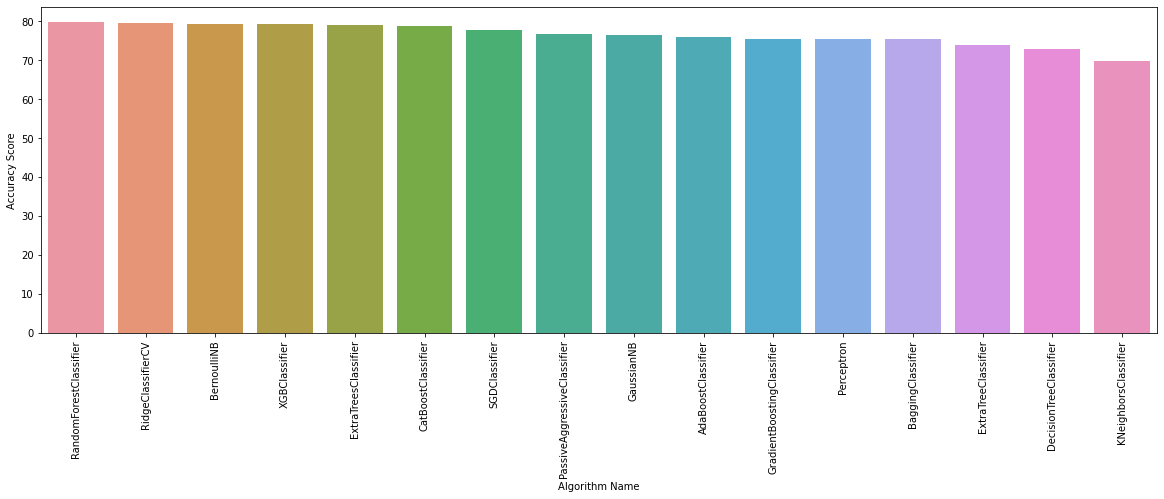

In [49]:
plt.rcParams["figure.figsize"] = (20,6)
sns.barplot(x="MLA Name", y="Accuracy Score", data = MLA_compare)
plt.xticks(rotation=90)
plt.xlabel("Algorithm Name")

In [50]:
classifier = linear_model.RidgeClassifierCV(cv=15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred), "\n\n")
print(confusion_matrix(y_test, y_pred))

Accuracy Score :  0.7944845699277742 


[[787  99]
 [214 423]]


In [53]:
sample_submission = pd.read_csv(os.path.join('kaggle', 'input', 'nlp-getting-started', 'sample_submission.csv'))
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [55]:
test_pred = classifier.predict(_test)

In [56]:
output = pd.DataFrame({'id': sample_submission.id, 'target': test_pred})
output.to_csv('submission.csv', index=False)